<div align = "center">
    <h4>Preparing Numeric Data</h4>
</div> 

In [1]:
cars <- mtcars

head(cars)

column_means <- colMeans(cars)         

print(column_means)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


       mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500 


In [2]:
# Repeat the column means along the rows of a matrix
center_matrix <- matrix( rep(column_means, nrow(cars)),   
                          nrow=nrow(cars),
                          ncol=ncol(cars),
                          byrow = TRUE)       # Construct row by row

centered <- cars - center_matrix     # Subtract column means

head( centered )             # Check the new data set

print(colMeans(centered))    # Check the new column means to confirm they are 0

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,0.909375,-0.1875,-70.721875,-36.6875,0.3034375,-0.59725,-1.38875,-0.4375,0.59375,0.3125,1.1875
Mazda RX4 Wag,0.909375,-0.1875,-70.721875,-36.6875,0.3034375,-0.34225,-0.82875,-0.4375,0.59375,0.3125,1.1875
Datsun 710,2.709375,-2.1875,-122.721875,-53.6875,0.2534375,-0.89725,0.76125,0.5625,0.59375,0.3125,-1.8125
Hornet 4 Drive,1.309375,-0.1875,27.278125,-36.6875,-0.5165625,-0.00225,1.59125,0.5625,-0.40625,-0.6875,-1.8125
Hornet Sportabout,-1.390625,1.8125,129.278125,28.3125,-0.4465625,0.22275,-0.82875,-0.4375,-0.40625,-0.6875,-0.8125
Valiant,-1.990625,-0.1875,-5.721875,-41.6875,-0.8365625,0.24275,2.37125,0.5625,-0.40625,-0.6875,-1.8125


          mpg           cyl          disp            hp          drat 
 4.440892e-16  0.000000e+00 -1.199041e-14  0.000000e+00 -1.526557e-16 
           wt          qsec            vs            am          gear 
 3.469447e-17  9.436896e-16  0.000000e+00  0.000000e+00  0.000000e+00 
         carb 
 0.000000e+00 


In [3]:
centered <- data.frame(t(t(cars) - column_means))
print(colMeans(centered))

          mpg           cyl          disp            hp          drat 
 4.440892e-16  0.000000e+00 -1.199041e-14  0.000000e+00 -1.526557e-16 
           wt          qsec            vs            am          gear 
 3.469447e-17  9.436896e-16  0.000000e+00  0.000000e+00  0.000000e+00 
         carb 
 0.000000e+00 


In [4]:
# Get the standard deviation of the mpg column
sd(centered$mpg)

[1] 6.026948

In [5]:
column_sds <- apply(centered,    # A matrix or data frame
                    MARGIN = 2,  # Operate on rows(1) or columns(2)
                    FUN = sd)    # Function to apply

print(column_sds)                   # Check standard deviations

        mpg         cyl        disp          hp        drat          wt 
  6.0269481   1.7859216 123.9386938  68.5628685   0.5346787   0.9784574 
       qsec          vs          am        gear        carb 
  1.7869432   0.5040161   0.4989909   0.7378041   1.6152000 


In [6]:
centered_scaled <- data.frame(t(t(centered) / column_sds))
summary(centered_scaled)

      mpg               cyl              disp               hp         
 Min.   :-1.6079   Min.   :-1.225   Min.   :-1.2879   Min.   :-1.3810  
 1st Qu.:-0.7741   1st Qu.:-1.225   1st Qu.:-0.8867   1st Qu.:-0.7320  
 Median :-0.1478   Median :-0.105   Median :-0.2777   Median :-0.3455  
 Mean   : 0.0000   Mean   : 0.000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4495   3rd Qu.: 1.015   3rd Qu.: 0.7688   3rd Qu.: 0.4859  
 Max.   : 2.2913   Max.   : 1.015   Max.   : 1.9468   Max.   : 2.7466  
      drat               wt               qsec                vs        
 Min.   :-1.5646   Min.   :-1.7418   Min.   :-1.87401   Min.   :-0.868  
 1st Qu.:-0.9661   1st Qu.:-0.6500   1st Qu.:-0.53513   1st Qu.:-0.868  
 Median : 0.1841   Median : 0.1101   Median :-0.07765   Median :-0.868  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000  
 3rd Qu.: 0.6049   3rd Qu.: 0.4014   3rd Qu.: 0.58830   3rd Qu.: 1.116  
 Max.   : 2.4939   Max.   : 2.2553   Max.   : 2.82675   Ma

In [7]:
auto_scaled <- scale(cars,          # Numeric data object
                    center=TRUE,    # Center the data?
                    scale=TRUE)     # Scale the data?

summary(auto_scaled)        # Check the auto scaled data

      mpg               cyl              disp               hp         
 Min.   :-1.6079   Min.   :-1.225   Min.   :-1.2879   Min.   :-1.3810  
 1st Qu.:-0.7741   1st Qu.:-1.225   1st Qu.:-0.8867   1st Qu.:-0.7320  
 Median :-0.1478   Median :-0.105   Median :-0.2777   Median :-0.3455  
 Mean   : 0.0000   Mean   : 0.000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4495   3rd Qu.: 1.015   3rd Qu.: 0.7688   3rd Qu.: 0.4859  
 Max.   : 2.2913   Max.   : 1.015   Max.   : 1.9468   Max.   : 2.7466  
      drat               wt               qsec                vs        
 Min.   :-1.5646   Min.   :-1.7418   Min.   :-1.87401   Min.   :-0.868  
 1st Qu.:-0.9661   1st Qu.:-0.6500   1st Qu.:-0.53513   1st Qu.:-0.868  
 Median : 0.1841   Median : 0.1101   Median :-0.07765   Median :-0.868  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000  
 3rd Qu.: 0.6049   3rd Qu.: 0.4014   3rd Qu.: 0.58830   3rd Qu.: 1.116  
 Max.   : 2.4939   Max.   : 2.2553   Max.   : 2.82675   Ma

**Dealing With Skewed Data**

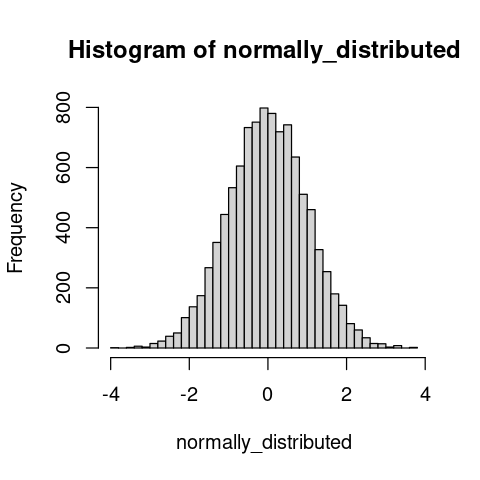

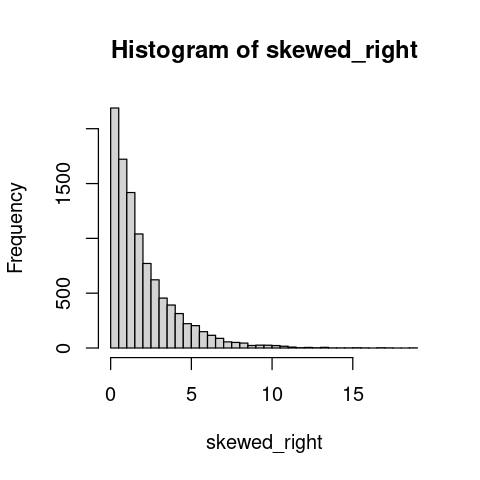

In [8]:
options(repr.plot.width=4, repr.plot.height=4)

# Generate normally distributed data
normally_distributed <- rnorm(10000)    

# Create a histogram of the distribution
hist(normally_distributed, breaks=30)

 # Generate skewed data
skewed_right <- rexp(10000, 0.5)       

 # Create a histogram of the distribution
hist(skewed_right, breaks=50)

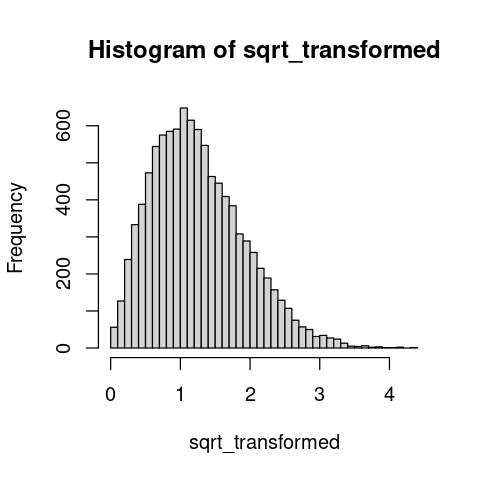

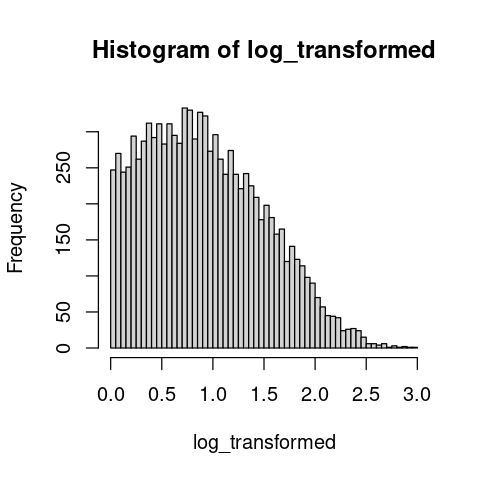

In [9]:
sqrt_transformed <- sqrt(skewed_right)

hist(sqrt_transformed, breaks=50)

log_transformed <- log(skewed_right+1)

hist(log_transformed, breaks=50)

**Highly Correlated Variables**

In [10]:
# Check the pairwise correlations of 6 variables
cor(cars[,1:6])

,mpg,cyl,disp,hp,drat,wt
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.6811719,-0.8676594
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.6999381,0.7824958
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.7102139,0.8879799
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.4487591,0.6587479
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.0000000,-0.7124406
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.7124406,1.0000000


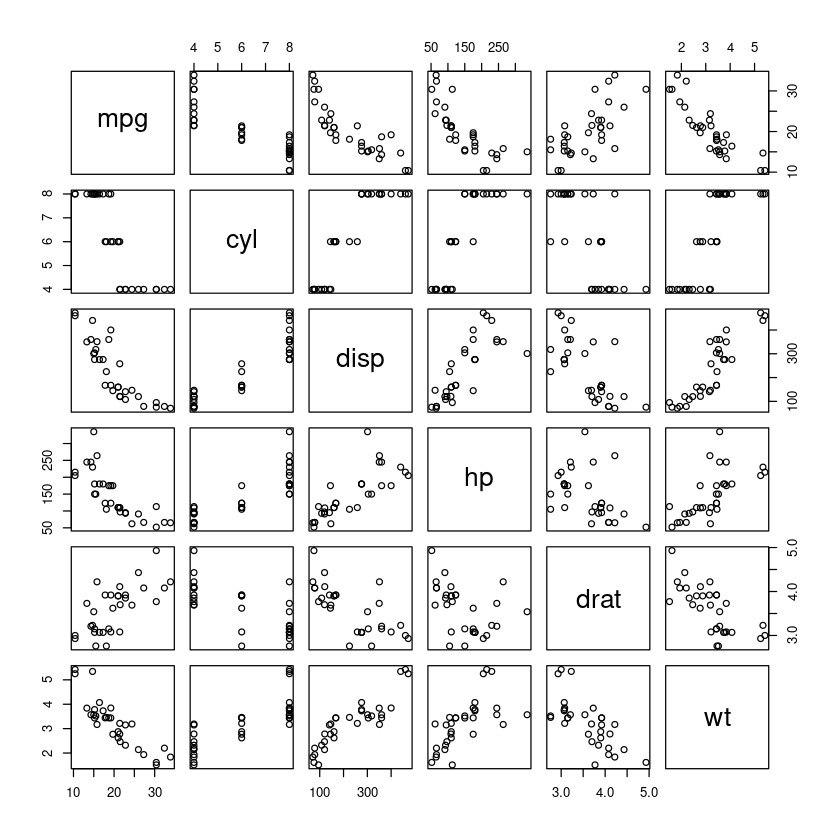

In [11]:
options(repr.plot.width=7, repr.plot.height=7)

pairs(cars[,1:6])

**Imputing Missing Data**

In [12]:
#install.packages("caret")
#install.packages("RANN")

In [13]:
library(caret)
library(RANN)

Loading required package: ggplot2

Loading required package: lattice



In [14]:
remove_rows <- c(3,5,8,9,15,20)
original_vals <- cars$mpg[remove_rows]

# Set some rows to NA
cars$mpg[remove_rows] <- NA

summary(cars$mpg)   # Check mpg to confirm NA's have been added

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.40   15.28   18.65   19.61   21.40   32.40       6 

In [15]:
impute <- preProcess(cars, method=c("knnImpute"))

# Predict new values based on preprocessing
cars <- predict(impute, cars)          

summary(cars$mpg)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.62809 -0.73995 -0.07274  0.07440  0.37620  2.26030 

In [16]:
# Imputed values
imp_vals <- cars$mpg[remove_rows] * sd(mtcars$mpg) + mean(mtcars$mpg)
imp_vals

# Original values
original_vals

# Average absolute difference
mean(abs(original_vals - imp_vals))

[1] 29.43108 16.75481 20.78139 23.12490 15.37000 29.43108

[1] 22.8 18.7 24.4 22.8 10.4 33.9

[1] 3.659785

In [17]:
mpg_median <- median(mtcars$mpg[-remove_rows])
mpg_median

mean(abs(original_vals - mpg_median))

[1] 18.65

[1] 6.266667